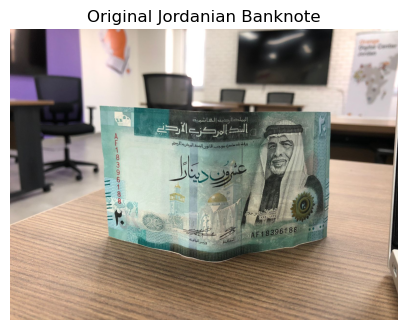

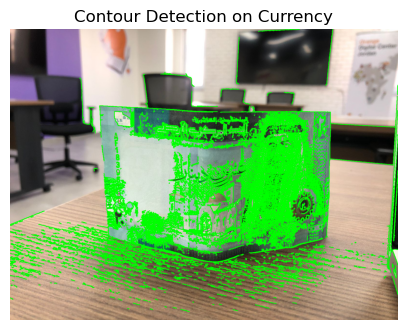

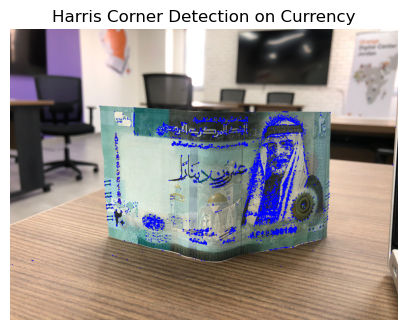

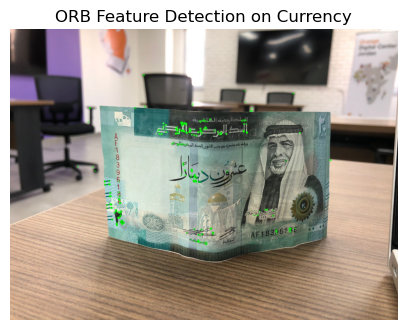

Number of ORB keypoints detected: 500


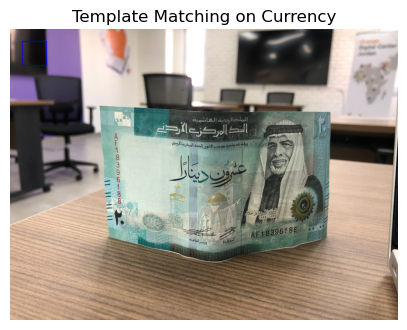

Note: Haar Cascade Face Detection is not applied because the image is a currency note.


In [1]:


import cv2
import numpy as np
import matplotlib.pyplot as plt


IMAGE_PATH = r"C:\Users\zaid\Downloads\archive (4)\twenty jordanian dinar\e94afae6-e70d-4820-8bb3-84e4aaf58f88.jpg"


img = cv2.imread(IMAGE_PATH)
if img is None:
    raise FileNotFoundError("Image not found. Check the path.")

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

def show(title, image):
    plt.figure(figsize=(5,5))
    if len(image.shape) == 2:
        plt.imshow(image, cmap="gray")
    else:
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis("off")
    plt.show()

show("Original Jordanian Banknote", img)


edges = cv2.Canny(gray, 100, 200)
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

contour_img = img.copy()
cv2.drawContours(contour_img, contours, -1, (0,255,0), 2)

show("Contour Detection on Currency", contour_img)


gray_float = np.float32(gray)
corners = cv2.cornerHarris(gray_float, blockSize=2, ksize=3, k=0.04)
corners = cv2.dilate(corners, None)

harris_img = img.copy()
harris_img[corners > 0.01 * corners.max()] = [255, 0, 0]

show("Harris Corner Detection on Currency", harris_img)


orb = cv2.ORB_create(nfeatures=500)
keypoints, descriptors = orb.detectAndCompute(gray, None)

orb_img = cv2.drawKeypoints(img, keypoints, None, color=(0,255,0))

show("ORB Feature Detection on Currency", orb_img)

print("Number of ORB keypoints detected:", len(keypoints))



template = gray[50:150, 50:150]

result = cv2.matchTemplate(gray, template, cv2.TM_CCOEFF_NORMED)
_, _, _, max_loc = cv2.minMaxLoc(result)

h, w = template.shape
tm_img = img.copy()
cv2.rectangle(tm_img, max_loc, (max_loc[0]+w, max_loc[1]+h), (255,0,0), 2)

show("Template Matching on Currency", tm_img)


print("Note: Haar Cascade Face Detection is not applied because the image is a currency note.")
